In [41]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = psycopg2.connect(
    host="",
    port="",
    database="",
    user="",
    password=""
)



import warnings
warnings.filterwarnings("ignore")


In [42]:
# Query for UCLA
ucla_query = """
SELECT date, raw_location, opponent, drops, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM UCLA_Offensive_Stats;
"""
ucla_data = pd.read_sql(ucla_query, conn)
ucla_data['team'] = 'UCLA'

# Query for USC
usc_query = """
SELECT date, raw_location, opponent, drops, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM USC_Offensive_Stats;
"""
usc_data = pd.read_sql(usc_query, conn)
usc_data['team'] = 'USC'

# Query for Washington
washington_query = """
SELECT date, raw_location, opponent, drops, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Washington_Offensive_Stats;
"""
washington_data = pd.read_sql(washington_query, conn)
washington_data['team'] = 'Washington'

# Query for Oregon
oregon_query = """
SELECT date, raw_location, opponent, drops, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Oregon_Offensive_Stats;
"""
oregon_data = pd.read_sql(oregon_query, conn)
oregon_data['team'] = 'Oregon'


combined_drops = pd.concat([ucla_data, usc_data, washington_data, oregon_data], ignore_index=True)

# Display the first few rows of the combined df
print(combined_drops.head())

         date raw_location             opponent  drops  temp_f  \
0  2022-10-22            @               Oregon    0.0    51.4   
1  2022-10-29            H             Stanford    3.0    63.5   
2  2022-11-05            @        Arizona State    1.0    58.0   
3  2022-11-12            H              Arizona    1.0    58.2   
4  2022-11-19            H  Southern California    2.0    60.9   

   precipitation_in  windspeed_mph  altitude_m  distance_from  team  
0             0.208           13.3       130.0         732.25  UCLA  
1             0.000            7.6       263.0           0.00  UCLA  
2             0.000            8.1       366.0         377.52  UCLA  
3             0.000            5.3       263.0           0.00  UCLA  
4             0.000            2.6       263.0           0.00  UCLA  


In [53]:
# drops by temp
temp_bins = [0, 40, 50, 60, 70, 80, float('inf')]
temp_labels = ['<40°F', '40-50°F', '50-60°F', '60-70°F', '70-80°F', '80+°F']

# Create a new column for temperature range
combined_drops['Temp_Range'] = pd.cut(combined_drops['temp_f'], bins=temp_bins, labels=temp_labels, right=False)

# Calculate total drops for each temperature range
temp_drops = combined_drops.groupby('Temp_Range')['drops'].sum()

# Display the results
print(temp_drops)


Temp_Range
<40°F       77.0
40-50°F    118.0
50-60°F    209.0
60-70°F    300.0
70-80°F    148.0
80+°F       47.0
Name: drops, dtype: float64


In [54]:
# drops by rain
precipitation_bins = [0, 0.1, 0.25, 0.5, 1, float('inf')]
precipitation_labels = ['0 in', '0-0.1 in', '0.1-0.25 in', '0.25-0.5 in', '>0.5 in']

# precipitation range
combined_drops['Precipitation_Range'] = pd.cut(combined_drops['precipitation_in'], bins=precipitation_bins, labels=precipitation_labels, right=False)

# total drops for each precipitation range
precipitation_drops = combined_drops.groupby('Precipitation_Range')['drops'].sum()


print(precipitation_drops)


Precipitation_Range
0 in           808.0
0-0.1 in        43.0
0.1-0.25 in     25.0
0.25-0.5 in      8.0
>0.5 in         15.0
Name: drops, dtype: float64


In [55]:
# drops by windspeed
wind_speed_bins = [0, 5, 10, 15, 20, float('inf')]
wind_speed_labels = ['0-5 mph', '5-10 mph', '10-15 mph', '15-20 mph', '20+ mph']

# Create a new column for wind speed range
combined_drops['Wind_Speed_Range'] = pd.cut(combined_drops['windspeed_mph'], bins=wind_speed_bins, labels=wind_speed_labels, right=False)

# Calculate total drops for each wind speed range
wind_speed_drops = combined_drops.groupby('Wind_Speed_Range')['drops'].sum()

# Display the results
print(wind_speed_drops)


Wind_Speed_Range
0-5 mph       89.0
5-10 mph     385.0
10-15 mph    256.0
15-20 mph    103.0
20+ mph       66.0
Name: drops, dtype: float64


In [64]:

# drops by altitude
altitude_bins = [0, 500, 1000, 1500, float('inf')]
altitude_labels = ['0-500 m', '500-1000 m', '1000-1500 m', '1500+']

# Create a new column for altitude range
combined_drops['Altitude_Range'] = pd.cut(combined_drops['altitude_m'], bins=altitude_bins, labels=altitude_labels, right=False)

# Calculate total drops for each altitude range
altitude_drops = combined_drops.groupby('Altitude_Range')['drops'].sum()


print(altitude_drops)


Altitude_Range
0-500 m        737.0
500-1000 m      91.0
1000-1500 m     39.0
1500+           28.0
Name: drops, dtype: float64


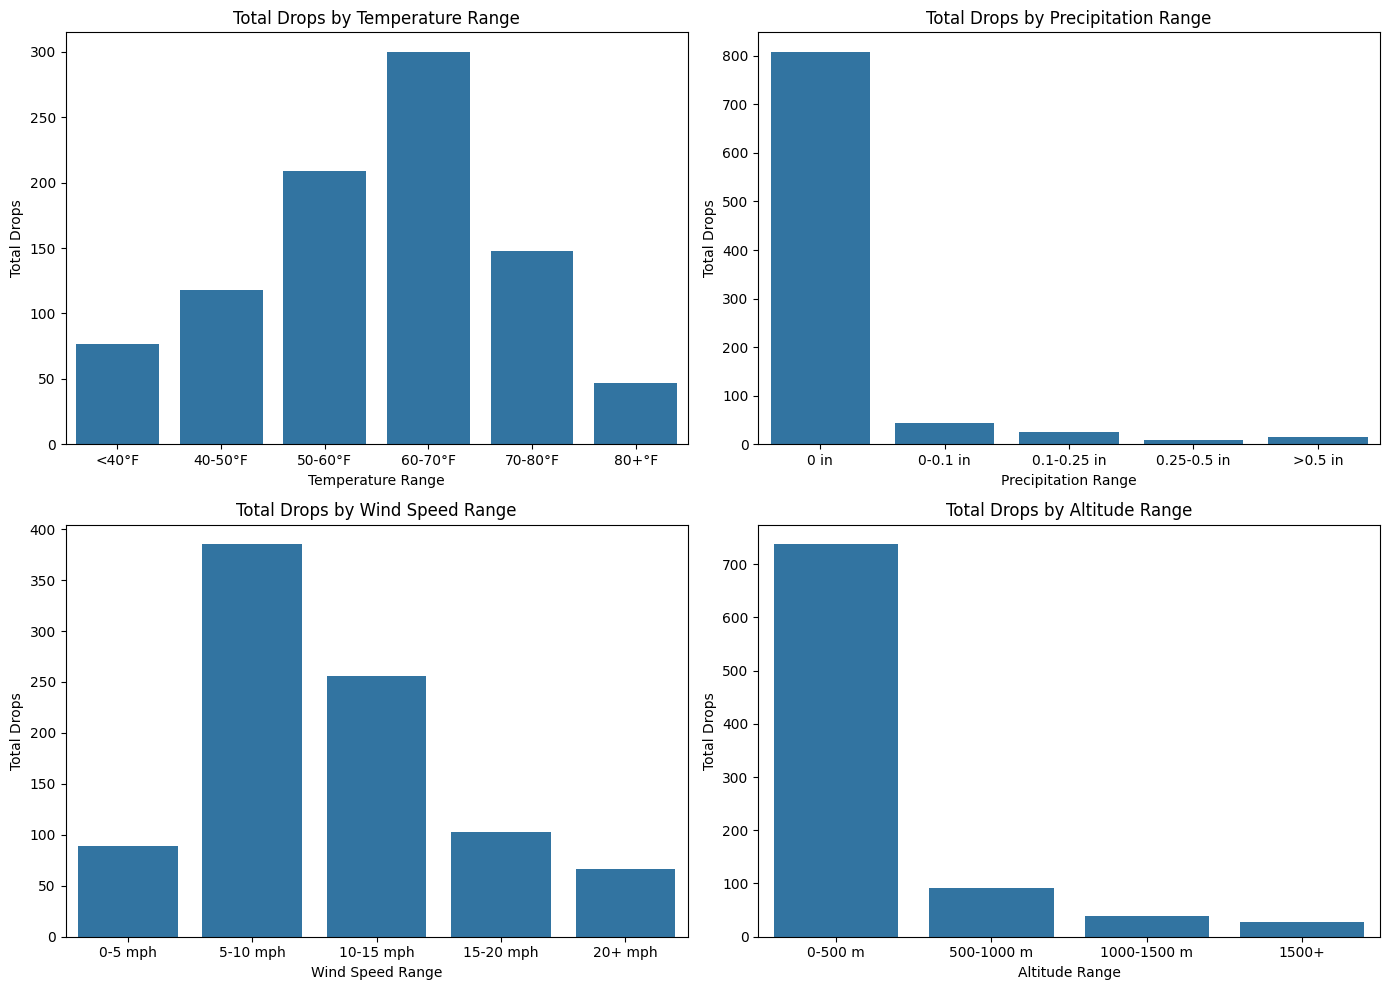

In [65]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Temperature vs. Drops
sns.barplot(x=temp_drops.index, y=temp_drops.values, ax=axs[0, 0])
axs[0, 0].set_title('Total Drops by Temperature Range')
axs[0, 0].set_xlabel('Temperature Range')
axs[0, 0].set_ylabel('Total Drops')

# Precipitation vs. Drops
sns.barplot(x=precipitation_drops.index, y=precipitation_drops.values, ax=axs[0, 1])
axs[0, 1].set_title('Total Drops by Precipitation Range')
axs[0, 1].set_xlabel('Precipitation Range')
axs[0, 1].set_ylabel('Total Drops')

# Wind Speed vs. Drops
sns.barplot(x=wind_speed_drops.index, y=wind_speed_drops.values, ax=axs[1, 0])
axs[1, 0].set_title('Total Drops by Wind Speed Range')
axs[1, 0].set_xlabel('Wind Speed Range')
axs[1, 0].set_ylabel('Total Drops')

# Altitude vs. Drops
sns.barplot(x=altitude_drops.index, y=altitude_drops.values, ax=axs[1, 1])
axs[1, 1].set_title('Total Drops by Altitude Range')
axs[1, 1].set_xlabel('Altitude Range')
axs[1, 1].set_ylabel('Total Drops')

# Adjust layout
plt.tight_layout()
plt.show()

In [66]:
# drops by temp
temp_games = combined_drops.groupby('Temp_Range')['date'].nunique()

# total drops for each temperature range
temp_drops = combined_drops.groupby('Temp_Range')['drops'].sum()

# average drops per game for each temperature range
avg_temp_drops = temp_drops / temp_games


print(avg_temp_drops)


Temp_Range
<40°F      2.264706
40-50°F    2.034483
50-60°F    2.132653
60-70°F    2.564103
70-80°F    2.349206
80+°F      2.611111
dtype: float64


In [67]:
# drops by rain
precipitation_games = combined_drops.groupby('Precipitation_Range')['date'].nunique()

# Calculate total drops for each precipitation range
precipitation_drops = combined_drops.groupby('Precipitation_Range')['drops'].sum()

# Calculate the average drops per game for each precipitation range
avg_precipitation_drops = precipitation_drops / precipitation_games

# Display the results
print(avg_precipitation_drops)


Precipitation_Range
0 in           3.607143
0-0.1 in       1.869565
0.1-0.25 in    1.923077
0.25-0.5 in    1.000000
>0.5 in        2.142857
dtype: float64


In [68]:
# drops by windspeed
wind_speed_games = combined_drops.groupby('Wind_Speed_Range')['date'].nunique()

# Calculate total drops for each wind speed range
wind_speed_drops = combined_drops.groupby('Wind_Speed_Range')['drops'].sum()

# Calculate the average drops per game for each wind speed range
avg_wind_speed_drops = wind_speed_drops / wind_speed_games

# Display the results
print(avg_wind_speed_drops)


Wind_Speed_Range
0-5 mph      1.977778
5-10 mph     2.452229
10-15 mph    2.285714
15-20 mph    1.907407
20+ mph      2.062500
dtype: float64


In [69]:
# drops by altitude
altitude_games = combined_drops.groupby('Altitude_Range')['date'].nunique()

# Calculate total drops for each altitude range
altitude_drops = combined_drops.groupby('Altitude_Range')['drops'].sum()

# Calculate the average drops per game for each altitude range
avg_altitude_drops = altitude_drops / altitude_games

# Display the results
print(avg_altitude_drops)


Altitude_Range
0-500 m        3.460094
500-1000 m     2.219512
1000-1500 m    1.772727
1500+          1.555556
dtype: float64


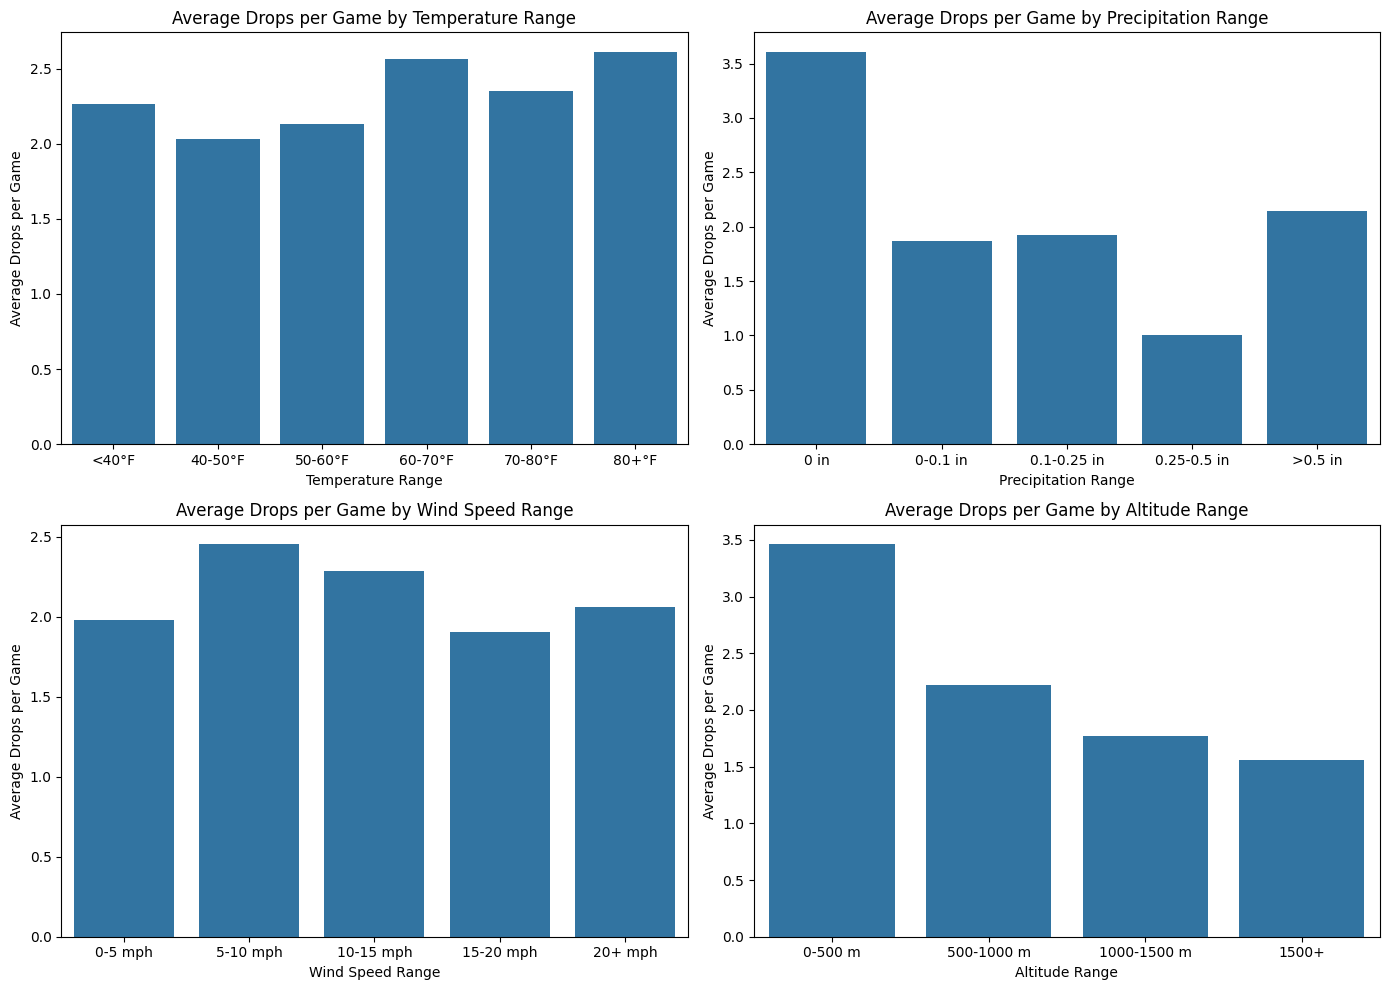

In [70]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Temperature vs. Average Drops per Game
sns.barplot(x=avg_temp_drops.index, y=avg_temp_drops.values, ax=axs[0, 0])
axs[0, 0].set_title('Average Drops per Game by Temperature Range')
axs[0, 0].set_xlabel('Temperature Range')
axs[0, 0].set_ylabel('Average Drops per Game')

# Precipitation vs. Average Drops per Game
sns.barplot(x=avg_precipitation_drops.index, y=avg_precipitation_drops.values, ax=axs[0, 1])
axs[0, 1].set_title('Average Drops per Game by Precipitation Range')
axs[0, 1].set_xlabel('Precipitation Range')
axs[0, 1].set_ylabel('Average Drops per Game')

# Wind Speed vs. Average Drops per Game
sns.barplot(x=avg_wind_speed_drops.index, y=avg_wind_speed_drops.values, ax=axs[1, 0])
axs[1, 0].set_title('Average Drops per Game by Wind Speed Range')
axs[1, 0].set_xlabel('Wind Speed Range')
axs[1, 0].set_ylabel('Average Drops per Game')

# Altitude vs. Average Drops per Game
sns.barplot(x=avg_altitude_drops.index, y=avg_altitude_drops.values, ax=axs[1, 1])
axs[1, 1].set_title('Average Drops per Game by Altitude Range')
axs[1, 1].set_xlabel('Altitude Range')
axs[1, 1].set_ylabel('Average Drops per Game')

# Adjust layout
plt.tight_layout()
plt.show()

In [71]:
# drops by distance
distance_bins = [0, 500, 1000, 1500, 2000, float('inf')]
distance_labels = ['0-500 miles', '500-1000 miles', '1000-1500 miles', '1500-2000 miles', '2000+ miles']

# Create a new column in the dataframe for distance ranges
combined_drops['Distance_Range'] = pd.cut(combined_drops['distance_from'], bins=distance_bins, labels=distance_labels, right=False)


print(combined_drops[['distance_from', 'Distance_Range']].head())



   distance_from  Distance_Range
0         732.25  500-1000 miles
1           0.00     0-500 miles
2         377.52     0-500 miles
3           0.00     0-500 miles
4           0.00     0-500 miles


In [72]:
# number of games in each distance range
distance_games = combined_drops.groupby('Distance_Range')['date'].nunique()

# total drops for each distance range
distance_drops = combined_drops.groupby('Distance_Range')['drops'].sum()

# average drops per game for each distance range
avg_distance_drops = distance_drops / distance_games


print(avg_distance_drops)


Distance_Range
0-500 miles        3.227979
500-1000 miles     2.289157
1000-1500 miles    1.894737
1500-2000 miles    1.526316
2000+ miles        1.750000
dtype: float64


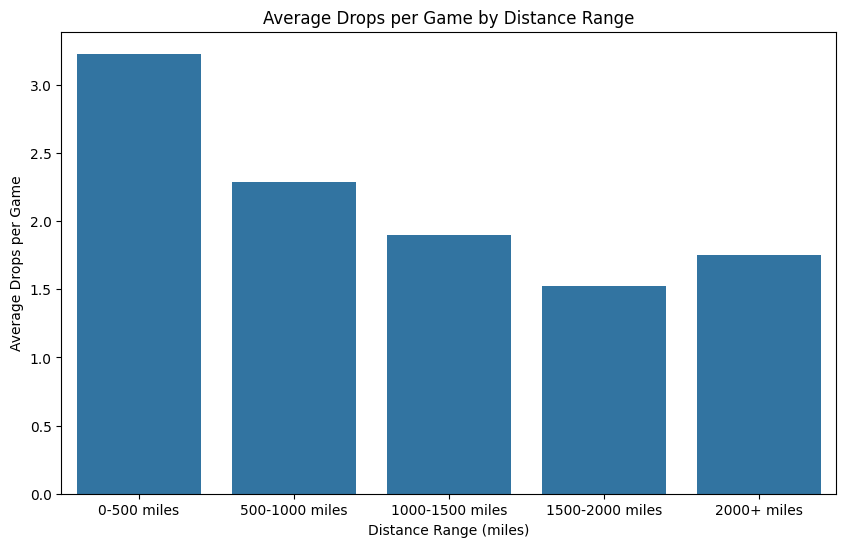

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_distance_drops.index, y=avg_distance_drops.values)
plt.title('Average Drops per Game by Distance Range')
plt.xlabel('Distance Range (miles)')
plt.ylabel('Average Drops per Game')
plt.show()
